In [143]:
import tensorflow
from random import randint
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz

In [144]:
train_labels=[]
train_samples=[]

In [145]:
test_labels=[]
test_samples=[]

In [146]:
for i in range(50):
# The ~5% of younger individuals who did experience side effects
   random_younger = randint(13,64)
   train_samples.append(random_younger)
   train_labels.append(1)


# The ~5% of older individuals who did  not experience side effects
   random_older= randint(65,100)
   train_samples.append(random_older)
   train_labels.append(0)
    
    
for i in range(1000):
# The ~95% of younger individuals who did not experience side effects
   random_younger = randint(13,64)
   train_samples.append(random_younger)
   train_labels.append(0)


# The ~95% of older individuals who did  experience side effects
   random_older= randint(65,100)
   train_samples.append(random_older)
   train_labels.append(1)

In [147]:
for i in range(10):
# The ~5% of younger individuals who did experience side effects
   random_younger = randint(13,64)
   test_samples.append(random_younger)
   test_labels.append(1)


# The ~5% of older individuals who did  not experience side effects
   random_older= randint(65,100)
   test_samples.append(random_older)
   test_labels.append(0)
    
    
for i in range(200):
# The ~95% of younger individuals who did not experience side effects
   random_younger = randint(13,64)
   test_samples.append(random_younger)
   test_labels.append(0)


# The ~95% of older individuals who did  experience side effects
   random_older= randint(65,100)
   test_samples.append(random_older)
   test_labels.append(1)

In [148]:
len(train_samples)

2100

In [149]:
len(train_labels)

2100

In [150]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [151]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [152]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [153]:
len(test_samples)

420

In [154]:
for i in scaled_train_samples:
     print(i)

[0.11494253]
[0.33333333]
[0.74712644]
[0.03448276]
[0.40229885]
[0.81609195]
[0.10344828]
[0.96551724]
[0.47126437]
[0.25287356]
[0.67816092]
[0.98850575]
[0.82758621]
[0.66666667]
[0.82758621]
[0.16091954]
[0.55172414]
[0.96551724]
[0.89655172]
[0.75862069]
[0.87356322]
[0.3908046]
[0.71264368]
[0.]
[0.74712644]
[0.68965517]
[0.34482759]
[0.]
[0.88505747]
[0.72413793]
[0.22988506]
[0.62068966]
[0.71264368]
[0.93103448]
[0.8045977]
[0.11494253]
[0.22988506]
[0.97701149]
[0.96551724]
[0.56321839]
[0.79310345]
[0.67816092]
[0.66666667]
[0.97701149]
[0.63218391]
[0.6091954]
[0.4137931]
[0.09195402]
[0.43678161]
[0.70114943]
[0.09195402]
[0.95402299]
[0.66666667]
[0.04597701]
[0.63218391]
[0.71264368]
[0.44827586]
[0.2183908]
[0.48275862]
[0.04597701]
[0.68965517]
[0.83908046]
[0.47126437]
[0.28735632]
[0.34482759]
[0.74712644]
[0.47126437]
[0.4137931]
[0.71264368]
[0.]
[0.96551724]
[0.20689655]
[0.27586207]
[0.89655172]
[0.62068966]
[0.8045977]
[0.6091954]
[0.59770115]
[0.59770115]
[0.13

In [155]:
X_train, X_test, y_train, y_test = train_test_split(train_samples, train_labels, test_size=0.4)

In [156]:
model = Sequential([
         Dense(units=8,input_shape=(1,),activation="relu"),
         Dense(units=32,activation= "relu"),
         Dense(units=16,activation= "relu"),
         Dense(units=2,activation= "softmax")
         ])

In [157]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 34        
Total params: 866
Trainable params: 866
Non-trainable params: 0
_________________________________________________________________


In [158]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [159]:
model.fit(x=train_samples,y=train_labels,validation_split=0.1, batch_size=10, epochs=40, shuffle=True, verbose=2)

Epoch 1/40
189/189 - 0s - loss: 0.7365 - accuracy: 0.5032 - val_loss: 0.6051 - val_accuracy: 0.5524
Epoch 2/40
189/189 - 0s - loss: 0.6425 - accuracy: 0.4942 - val_loss: 0.6037 - val_accuracy: 0.5714
Epoch 3/40
189/189 - 0s - loss: 0.6293 - accuracy: 0.5228 - val_loss: 0.5852 - val_accuracy: 0.6143
Epoch 4/40
189/189 - 0s - loss: 0.6175 - accuracy: 0.5630 - val_loss: 0.5780 - val_accuracy: 0.6667
Epoch 5/40
189/189 - 0s - loss: 0.6045 - accuracy: 0.5952 - val_loss: 0.5728 - val_accuracy: 0.7429
Epoch 6/40
189/189 - 0s - loss: 0.5936 - accuracy: 0.6392 - val_loss: 0.5492 - val_accuracy: 0.7143
Epoch 7/40
189/189 - 0s - loss: 0.5805 - accuracy: 0.6619 - val_loss: 0.5360 - val_accuracy: 0.7143
Epoch 8/40
189/189 - 0s - loss: 0.5696 - accuracy: 0.6825 - val_loss: 0.5497 - val_accuracy: 0.8381
Epoch 9/40
189/189 - 0s - loss: 0.5579 - accuracy: 0.7164 - val_loss: 0.5237 - val_accuracy: 0.8143
Epoch 10/40
189/189 - 0s - loss: 0.5471 - accuracy: 0.7302 - val_loss: 0.5111 - val_accuracy: 0.8190

In [160]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [161]:
scaled_test_samples

array([[0.06896552],
       [0.42528736],
       [0.87356322],
       [0.94252874],
       [0.29885057],
       [0.85057471],
       [0.59770115],
       [0.81609195],
       [0.88505747],
       [0.08045977],
       [0.93103448],
       [0.31034483],
       [0.18390805],
       [0.73563218],
       [0.97701149],
       [0.49425287],
       [0.90804598],
       [0.88505747],
       [0.71264368],
       [0.44827586],
       [0.97701149],
       [0.18390805],
       [0.34482759],
       [0.79310345],
       [0.72413793],
       [0.17241379],
       [0.49425287],
       [0.94252874],
       [0.35632184],
       [0.64367816],
       [0.28735632],
       [0.40229885],
       [0.20689655],
       [0.70114943],
       [0.14942529],
       [0.45977011],
       [0.59770115],
       [0.65517241],
       [0.24137931],
       [0.95402299],
       [0.82758621],
       [0.49425287],
       [0.25287356],
       [0.88505747],
       [0.62068966],
       [0.75862069],
       [0.63218391],
       [0.448

# Predictions

In [162]:
predictions=model.predict(x=test_samples, batch_size=10,verbose=0)

In [163]:
predictions

array([[0.95426863, 0.04573133],
       [0.6565006 , 0.34349948],
       [0.08515416, 0.9148459 ],
       [0.05524133, 0.9447587 ],
       [0.81759   , 0.18241008],
       [0.09802905, 0.901971  ],
       [0.3741201 , 0.6258799 ],
       [0.12059023, 0.8794098 ],
       [0.07930845, 0.9206915 ],
       [0.95131046, 0.04868954],
       [0.05942753, 0.94057244],
       [0.8057482 , 0.19425176],
       [0.906784  , 0.09321602],
       [0.19085875, 0.8091413 ],
       [0.04429054, 0.95570946],
       [0.5455756 , 0.4544244 ],
       [0.06870486, 0.9312951 ],
       [0.07930845, 0.9206915 ],
       [0.21594419, 0.78405577],
       [0.62075645, 0.37924364],
       [0.04429054, 0.95570946],
       [0.906784  , 0.09321602],
       [0.76676846, 0.23323148],
       [0.13801496, 0.861985  ],
       [0.20311323, 0.7968868 ],
       [0.91313046, 0.0868695 ],
       [0.5455756 , 0.4544244 ],
       [0.05524133, 0.9447587 ],
       [0.7526254 , 0.24737452],
       [0.3048018 , 0.69519824],
       [0.

In [164]:
model.predict([90])

array([[0.07930845, 0.9206915 ]], dtype=float32)

In [165]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [166]:
rounded_predictions

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,

# Confusion Matrix

In [167]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [168]:
cm = confusion_matrix(y_true=test_labels, y_pred= rounded_predictions)

In [169]:
def plot_confusion_matrix(cm, classes,
                                            normalize=False,
                                            title="Confusion Matrix" ,
                                            cmap=plt.cm.Blues):


     plt.imshow(cm, interpolation="nearest", cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks= np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     if normalize:
           cm= cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis]
           print('Normalized confusion matrix')
     else:
            print("Confusion matrix, without normalization")
     print(cm)

     thresh= cm.max()/2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                                      
     plt.tight_layout()
     plt.ylabel("True label")
     plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[180  30]
 [ 10 200]]


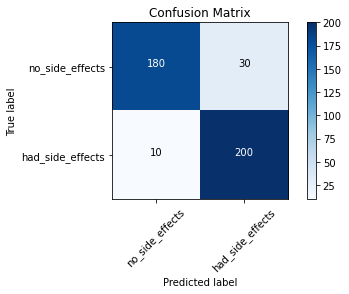

In [170]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title= 'Confusion Matrix')